Machine Learning Models - Commodity Data

# Import Dependencies

In [75]:
# Dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
from datetime import datetime
from datetime import date
from datetime import timedelta
from scipy.stats import linregress
from scipy.stats import zscore
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [77]:
csv_file_train_model_all = os.path.join("train_model_all.csv")
csv_file_test_model_all = os.path.join("test_model_all.csv")
train_model_all_df = pd.read_csv(csv_file_train_model_all)
test_model_all_df = pd.read_csv(csv_file_test_model_all)
train_model_all_df.dropna()
test_model_all_df.dropna()
# train_model_all_df.isnull().sum()


,Unnamed: 0,Date,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,...,SP_Ctnupper_correl,SP_Ctnlower_correl,SPCtnsignal55,SPcorn_dly_chg_correlation,SPcorn_dly_chg_corr_mean,SPcorn_Std_daily_chg_correl,SP_cornupper_correl,SP_cornlower_correl,SPcornsignal55,Settle
0,3811,2016-05-03,-0.231032,-0.307550,0.048284,-0.210982,-0.404118,0.000000,0.344396,0.387976,...,0.240275,0.077684,0.000000,0.238012,0.172389,0.068875,0.310140,0.034639,0.0,-0.488043
1,3812,2016-05-04,-0.130767,-0.305805,0.052783,-0.200239,-0.411371,0.069472,0.345444,0.389207,...,0.241311,0.077847,0.000000,0.225882,0.175472,0.067363,0.310198,0.040746,0.0,-0.147131
2,3813,2016-05-05,-0.142109,-0.304396,0.056060,-0.192276,-0.416515,0.050167,0.333411,0.389917,...,0.244431,0.077631,0.000000,0.210024,0.177854,0.066195,0.310243,0.045465,0.0,0.429764
3,3814,2016-05-06,-0.116200,-0.302522,0.060505,-0.181512,-0.423531,0.065312,0.331790,0.390606,...,0.247807,0.077464,0.000000,0.211231,0.180124,0.065131,0.310387,0.049861,0.0,0.073359
4,3815,2016-05-09,-0.107181,-0.300515,0.065036,-0.170444,-0.430586,0.063262,0.326915,0.391224,...,0.250897,0.077684,0.000000,0.208016,0.182191,0.064155,0.310501,0.053882,0.0,1.124007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,4858,2020-07-06,-0.132872,0.220628,0.140631,0.501889,-0.060633,-0.072239,0.663913,0.516120,...,0.685556,0.202896,-0.000872,0.173980,0.283494,0.120738,0.524970,0.042018,0.0,-1.122885
1048,4859,2020-07-07,-0.092294,0.214357,0.146736,0.507828,-0.079114,-0.013180,0.637124,0.519495,...,0.680948,0.193020,0.000000,0.168869,0.279098,0.120423,0.519944,0.038251,0.0,0.855726
1049,4860,2020-07-08,-0.074147,0.208497,0.151712,0.511921,-0.094927,0.000000,0.628596,0.522603,...,0.675340,0.186508,0.000000,0.131807,0.273848,0.120437,0.514722,0.032974,0.0,-0.705733
1050,4861,2020-07-09,-0.119715,0.201694,0.157877,0.517449,-0.114060,-0.005655,0.594933,0.525019,...,0.669727,0.179363,0.000000,0.085534,0.267484,0.120981,0.509446,0.025523,0.0,1.181920


In [78]:
training_master_df = train_model_all_df.reset_index().copy()
print(f"Training Start Date: {training_master_df.Date[0]}")
print(f"Training End Date: {training_master_df.Date[len(training_master_df)-1]}")
training_master_df = training_master_df.drop(columns=['Date'])
training_master_df = training_master_df.drop(columns=['index','Unnamed: 0'])

training_master_df

Training Start Date: 1998-05-01
Training End Date: 2016-05-02


,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,SP_Coppupper_correl,...,SP_Ctnupper_correl,SP_Ctnlower_correl,SPCtnsignal55,SPcorn_dly_chg_correlation,SPcorn_dly_chg_corr_mean,SPcorn_Std_daily_chg_correl,SP_cornupper_correl,SP_cornlower_correl,SPcornsignal55,Settle
0,0.053978,0.004485,0.048781,0.102048,-0.093077,0.0,0.093600,0.013084,0.058865,0.130815,...,0.123824,-0.041547,0.000000,0.102287,0.194098,0.040222,0.274541,0.113654,-0.011368,-0.087642
1,0.026535,0.005877,0.048287,0.102451,-0.090696,0.0,0.080885,0.012908,0.058643,0.130195,...,0.120567,-0.044473,0.000000,0.062681,0.190938,0.043523,0.277984,0.103893,-0.041212,-0.570175
2,0.030591,0.007245,0.047893,0.103032,-0.088541,0.0,0.088030,0.012755,0.058431,0.129616,...,0.117860,-0.048022,-0.004248,0.048548,0.187629,0.047217,0.282062,0.093195,-0.044647,-1.014557
3,0.043537,0.008527,0.047904,0.104336,-0.087282,0.0,0.142194,0.013848,0.060285,0.134418,...,0.116997,-0.053514,-0.015565,0.025993,0.184070,0.051758,0.287586,0.080555,-0.054562,-1.114082
4,0.060825,0.010146,0.048143,0.106433,-0.086141,0.0,0.186793,0.015880,0.064145,0.144171,...,0.119988,-0.064960,-0.058918,0.034760,0.180622,0.055222,0.291065,0.070179,-0.035419,1.126634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,-0.360144,-0.293723,0.068138,-0.157448,-0.429998,0.0,0.430473,0.375576,0.082091,0.539757,...,0.233378,0.068217,0.000000,0.232528,0.157910,0.079000,0.315909,-0.000089,0.000000,0.108147
3806,-0.301166,-0.296983,0.063923,-0.169137,-0.424829,0.0,0.425380,0.379519,0.079070,0.537659,...,0.234666,0.069722,0.000000,0.212288,0.161114,0.077525,0.316165,0.006064,0.000000,-0.876245
3807,-0.320142,-0.300648,0.059101,-0.182445,-0.418850,0.0,0.406698,0.382728,0.076436,0.535600,...,0.235674,0.072220,0.000000,0.172002,0.163608,0.075569,0.314746,0.012471,0.000000,-0.641802
3808,-0.342376,-0.304663,0.053989,-0.196686,-0.412640,0.0,0.357236,0.385053,0.073575,0.532203,...,0.236351,0.074987,0.000000,0.168743,0.166078,0.073408,0.312893,0.019262,0.000000,0.743449


In [79]:
testing_master_df = test_model_all_df.reset_index().copy()
print(f"Testing Start Date: {testing_master_df.Date[0]}")
print(f"Testing End Date: {testing_master_df.Date[len(testing_master_df)-1]}")
testing_master_df = testing_master_df.drop(columns=['index','Date'])
testing_master_df = testing_master_df.drop(columns=['Unnamed: 0'])
testing_master_df

Testing Start Date: 2016-05-03
Testing End Date: 2020-07-13


,SPGold_dly_chg_correlation,SPGold_dly_chg_corr_mean,SPGold_Std_daily_chg_correl,SP_Goldupper_correl,SP_Goldlower_correl,SPGoldsignal,SPCopp_dly_chg_correlation,SPCopp_dly_chg_corr_mean,SPCopp_Std_daily_chg_correl,SP_Coppupper_correl,...,SP_Ctnupper_correl,SP_Ctnlower_correl,SPCtnsignal55,SPcorn_dly_chg_correlation,SPcorn_dly_chg_corr_mean,SPcorn_Std_daily_chg_correl,SP_cornupper_correl,SP_cornlower_correl,SPcornsignal55,Settle
0,-0.231032,-0.307550,0.048284,-0.210982,-0.404118,0.000000,0.344396,0.387976,0.069791,0.527557,...,0.240275,0.077684,0.0,0.238012,0.172389,0.068875,0.310140,0.034639,0.0,-0.488043
1,-0.130767,-0.305805,0.052783,-0.200239,-0.411371,0.069472,0.345444,0.389207,0.068392,0.525992,...,0.241311,0.077847,0.0,0.225882,0.175472,0.067363,0.310198,0.040746,0.0,-0.147131
2,-0.142109,-0.304396,0.056060,-0.192276,-0.416515,0.050167,0.333411,0.389917,0.067588,0.525092,...,0.244431,0.077631,0.0,0.210024,0.177854,0.066195,0.310243,0.045465,0.0,0.429764
3,-0.116200,-0.302522,0.060505,-0.181512,-0.423531,0.065312,0.331790,0.390606,0.066779,0.524165,...,0.247807,0.077464,0.0,0.211231,0.180124,0.065131,0.310387,0.049861,0.0,0.073359
4,-0.107181,-0.300515,0.065036,-0.170444,-0.430586,0.063262,0.326915,0.391224,0.066012,0.523248,...,0.250897,0.077684,0.0,0.208016,0.182191,0.064155,0.310501,0.053882,0.0,1.124007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,-0.092294,0.214357,0.146736,0.507828,-0.079114,-0.013180,0.637124,0.519495,0.063459,0.646413,...,0.680948,0.193020,0.0,0.168869,0.279098,0.120423,0.519944,0.038251,0.0,0.855726
1049,-0.074147,0.208497,0.151712,0.511921,-0.094927,0.000000,0.628596,0.522603,0.064550,0.651704,...,0.675340,0.186508,0.0,0.131807,0.273848,0.120437,0.514722,0.032974,0.0,-0.705733
1050,-0.119715,0.201694,0.157877,0.517449,-0.114060,-0.005655,0.594933,0.525019,0.064729,0.654477,...,0.669727,0.179363,0.0,0.085534,0.267484,0.120981,0.509446,0.025523,0.0,1.181920
1051,-0.195394,0.193323,0.166432,0.526186,-0.139541,-0.055854,0.583743,0.527126,0.064720,0.656565,...,0.665998,0.169127,0.0,0.017036,0.259820,0.123273,0.506366,0.013275,0.0,-0.947119


In [82]:
# testing_master_df.isnull().sum()
testing_master_df['Settle'] = testing_master_df['Settle'].replace(np.nan, 0)
# testing_master_df.isnull().sum()

# Data Loading and Machine Learning

In [109]:
# Assigning data to X and y

# Training Data
X_train = training_master_df[[
#                               'SPGold_dly_chg_corr_mean',
#                               'SPGoldsignal',
                              'SPCopp_dly_chg_corr_mean',
                              'SPCoppsignal55',
                              'SPCgr_dly_chg_corr_mean',
                              'SPCgrsignal55',
                              'SPCrude_dly_chg_corr_mean',
                              'SPCrudesignal55'
#                               'SPLNH_dly_chg_corr_mean',
#                               'SPLNHsignal55',
#                               'SPSoyB_dly_chg_corr_mean',
#                               'SPSoyBsignal55'
#                               'SPCtn_dly_chg_corr_mean',
#                               'SPCtnsignal55',
#                               'SPcorn_dly_chg_corr_mean',
#                               'SPcornsignal55'
                                ]]

y_train = training_master_df['Settle'].values.reshape(-1, 1)
print(X_train.shape, y_train.shape)

# Testing Data
X_test = testing_master_df[[
#                               'SPGold_dly_chg_corr_mean',
#                               'SPGoldsignal',
                              'SPCopp_dly_chg_corr_mean',
                              'SPCoppsignal55',
                              'SPCgr_dly_chg_corr_mean',
                              'SPCgrsignal55',
                              'SPCrude_dly_chg_corr_mean',
                              'SPCrudesignal55',
#                               'SPLNH_dly_chg_corr_mean',
#                               'SPLNHsignal55',
#                               'SPSoyB_dly_chg_corr_mean',
#                               'SPSoyBsignal55'
#                               'SPCtn_dly_chg_corr_mean',
#                               'SPCtnsignal55',
#                               'SPcorn_dly_chg_corr_mean',
#                               'SPcornsignal55'
                           ]]

y_test = testing_master_df['Settle'].values.reshape(-1, 1)
print(X_test.shape, y_test.shape)

(3810, 6) (3810, 1)
(1053, 6) (1053, 1)


In [110]:
X_train

,SPCopp_dly_chg_corr_mean,SPCoppsignal55,SPCgr_dly_chg_corr_mean,SPCgrsignal55,SPCrude_dly_chg_corr_mean,SPCrudesignal55
0,0.013084,0.000000,0.004098,0.000000,-0.160855,0.000000
1,0.012908,0.000000,0.003130,0.000000,-0.157392,0.000000
2,0.012755,0.000000,0.002210,0.000000,-0.153750,0.000000
3,0.013848,0.007776,0.002455,0.000000,-0.150078,0.000000
4,0.015880,0.042623,0.003363,0.004261,-0.146065,0.000000
...,...,...,...,...,...,...
3805,0.375576,0.000000,0.459617,0.000000,0.535085,0.000000
3806,0.379519,0.000000,0.464248,0.000000,0.536150,0.000000
3807,0.382728,0.000000,0.468557,0.000000,0.537134,0.000000
3808,0.385053,0.000000,0.472652,0.000000,0.538121,0.000000


In [111]:
y_train

array([[-0.08764242],
       [-0.57017544],
       [-1.01455668],
       ...,
       [-0.64180189],
       [ 0.74344912],
       [-0.84684249]])

In [112]:
X_test

,SPCopp_dly_chg_corr_mean,SPCoppsignal55,SPCgr_dly_chg_corr_mean,SPCgrsignal55,SPCrude_dly_chg_corr_mean,SPCrudesignal55
0,0.387976,0.0,0.477257,0.000000,0.536820,-0.059405
1,0.389207,0.0,0.477760,0.000000,0.536906,0.000000
2,0.389917,0.0,0.478088,0.000000,0.535654,-0.036778
3,0.390606,0.0,0.478056,0.000000,0.534308,-0.031276
4,0.391224,0.0,0.478042,0.000000,0.532943,-0.028612
...,...,...,...,...,...,...
1048,0.519495,0.0,0.226509,0.024306,0.261162,0.002086
1049,0.522603,0.0,0.234440,0.000000,0.261001,0.000000
1050,0.525019,0.0,0.241481,0.000000,0.259685,0.000000
1051,0.527126,0.0,0.248876,0.000000,0.259492,0.000000


In [113]:
y_test

array([[-0.48804295],
       [-0.14713095],
       [ 0.42976424],
       ...,
       [ 1.18191982],
       [-0.94711918],
       [ 0.        ]])

In [114]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [115]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.0016758479972941442
Testing Score: -0.0015661274838343342


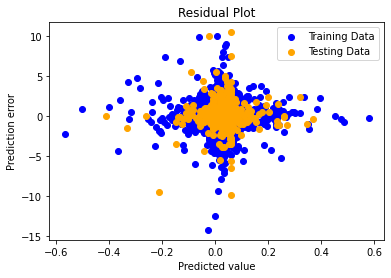

In [116]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
# plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max())
plt.title("Residual Plot")
plt.xlabel("Predicted value")
plt.ylabel("Prediction error")
plt.show()
### END SOLUTION